In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# currently (03/2019) scaleogram needs install via https://github.com/alsauve/scaleogram
# because an old PyWavelets (0.5.2) is installend and PyWavelets > 1.0 is needed
import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


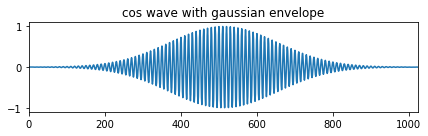

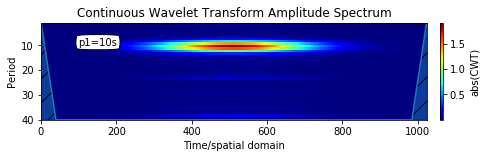

In [2]:
# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 40) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

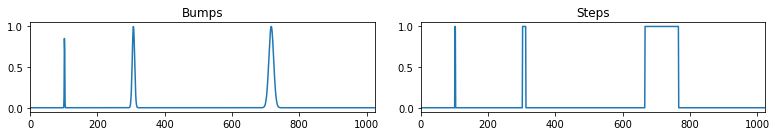

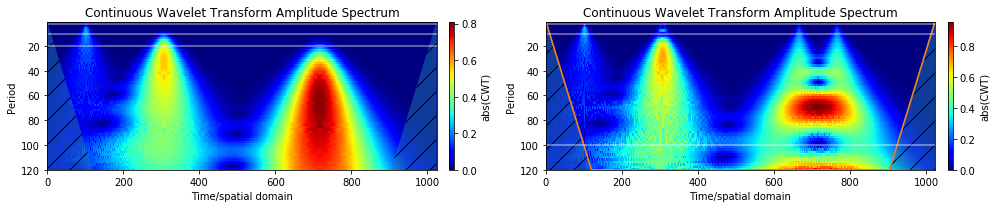

In [3]:
# several gaussian bumps given sigma
s1=1; s2=5; s3=10
events = [ns*0.1, ns*0.3, ns*0.7]
bumps = np.exp(-((time-events[0])/s1)**2) + np.exp(-((time-events[1])/s2)**2) + \
        np.exp(-((time-events[2])/s3)**2) 

# several steps given half-hidth
w1=1; w2=5; w3= 50
steps = ((time > events[0]-w1) & (time < events[0]+w1)) + \
    ((time > events[1]-w2) & (time < events[1]+w2)) + \
    ((time > events[2]-w3) & (time < events[2]+w3))

# plot the pulses
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 2)); 
ax1.set_title("Bumps"); ax2.set_title("Steps")
lines = ax1.plot(bumps); ax1.set_xlim(0, len(time))
lines = ax2.plot(steps); ax2.set_xlim(0, len(time))
fig1.tight_layout()

# and the scaleogram
scales_bumps = scg.periods2scales(np.arange(1, 120, 2) )
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14,3));  
ax3 = scg.cws(bumps, scales=scales_bumps, ax=ax3)
ax4 = scg.cws(steps, scales=scales_bumps, ax=ax4)
for bmpw, stepw in [(2*s1, 2*w1), (2*s2,2*w2), (2*s3, 2*w3)]:
    ax3.plot(ax3.get_xlim(), bmpw*np.ones(2), 'w-', alpha=0.5)
    ax4.plot(ax4.get_xlim(), stepw*np.ones(2), 'w-', alpha=0.5)
fig2.tight_layout()

In [4]:
print(ax3)

AxesSubplot(0.0503968,0.193519;0.386294x0.682407)


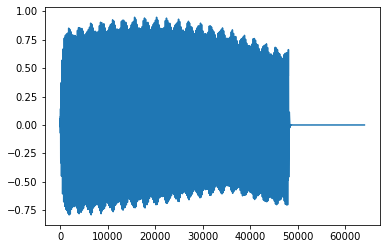

In [6]:
y = np.load("test.pnz.npy")
plt.plot(y)
plt.show()

In [29]:
print(np.arange(1,200,10))

[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191]


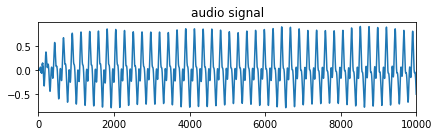

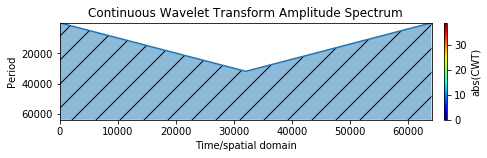

In [39]:
time = np.arange(len(y))
zoom = [0,10000]
# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(y[zoom[0]:zoom[1]]); 
ax1.set_xlim(0, len(time[zoom[0]:zoom[1]]))
ax1.set_title("audio signal")
fig1.tight_layout()

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 64000,100) )

# and the scaleogram
ax2 = scg.cws(y, scales=scales, figsize=(6.9,2.3)); 
plt.tight_layout()

# scales = scg.periods2scales( np.arange(1, 190) )
# # and the scaleogram
# ax2 = scg.cws(y, scales=scales, figsize=(6.9,2.3)); 
# plt.tight_layout()
